In [1]:
# import some packages

%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import Quandl

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Grab all years of soybean and cocoa data using Quandl.

soybean_all = Quandl.get("WSJ/SOYB_1", trim_start="2007-05-01", trim_end="2015-10-31")
cocoa_all = Quandl.get("ODA/PCOCO_USD", trim_start="2007-05-01", trim_end="2015-10-31")

print 'Soybeans: ', min(soybean_all.index),  max(soybean_all.index)
print 'Cocoa: ', min(cocoa_all.index),  max(cocoa_all.index)

Soybeans:  2007-05-01 00:00:00 2015-10-30 00:00:00
Cocoa:  2007-05-31 00:00:00 2015-10-31 00:00:00


In [3]:
# Smooth the soybean daily data w/rolling 30 day window
soybean_smooth = pd.rolling_mean(soybean_all, 30)

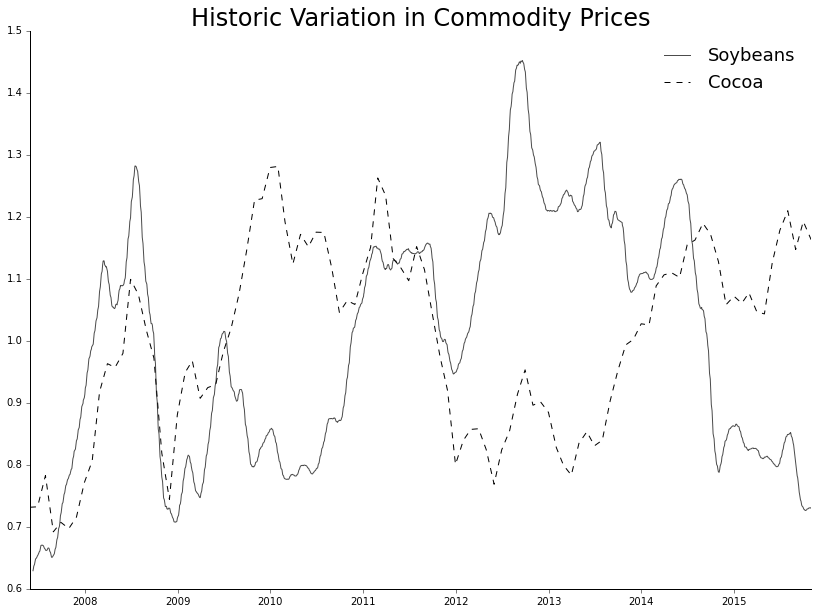

In [11]:
plt.figure(figsize=(14,10))
ax = plt.subplot(111)

#do not display top and right axes
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# the OP way (better):
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()

ax.plot(soybean_smooth.index, soybean_smooth[u'Value']/np.mean(soybean_smooth[u'Value']), label='Soybeans', color='black', alpha=0.7)
ax.plot(cocoa_all.index, cocoa_all[u'Value']/np.mean(cocoa_all[u'Value']), "--", label='Cocoa', color='black')

ax.legend(frameon=False,prop={'size':18})

plt.title('Historic Variation in Commodity Prices', size=24)

savefig('soybean_cocoa_prices.png')